In [1]:
import cv2
from matplotlib import pyplot as plt
import lane_detection
import lane_following
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
IP_ADDRESS = "192.168.1.102"

In [ ]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame

        vcap.release()

vcap.release()

In [2]:
img = cv2.imread('frame_from_auv.jpg')

In [ ]:
type(img)

numpy.ndarray

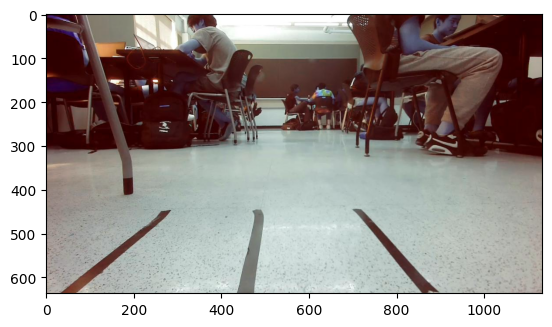

In [4]:
plt.imshow(img)

[[-4.065217391304348, 436.2620320855615, 437, 316, 483, 129], [-7.380952380952381, 472.10322580645163, 474, 305, 495, 150]]
-5.242832594736366
[0, 0, 515.0276004830084, 0, 454.18262894600656, 319]
-294.68262894600656
turn right -28.609963975340442 degrees strafe right


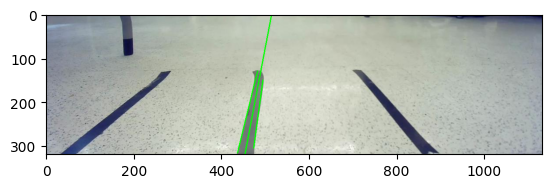

In [3]:

temp = img.copy()[int(img.shape[0]/2):]
c = temp.shape[0]/2
w = temp.shape[1]
lines = lane_detection.detect_lines(temp, threshold1=50,threshold2=50, apertureSize=3,maxLineGap = 50, minLineLength=50)
lanes = lane_detection.detect_lanes(lines, temp.shape[0])
#lineDrawing = lane_detection.draw_lines(temp, lines)
drawing = lane_detection.draw_lanes(temp, lanes)
center = lane_following.get_lane_center(lanes)

print(lanes)

cen = lane_following.get_center_line(center[0], center[1],temp.shape[0])
print(cen)
plt.imshow(cv2.cvtColor(lane_following.draw_center(drawing, cen), cv2.COLOR_BGR2RGB))
print(lane_following.recommend_direction(center[0], center[1], c, lanes, w))

#plt.imshow(cv2.cvtColor(lineDrawing, cv2.COLOR_BGR2RGB))